#importing necessary modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the dataset

In [8]:
data=pd.read_csv(r'/Users/apple/Downloads/simple.csv')
data.head()

,experience,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


#data exploration

In [9]:
data.shape #retunrs the number of records in the data set along with columns count

(30, 2)

In [10]:
data.isnull().sum() #checking for the null values 

experience    0
salary        0
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


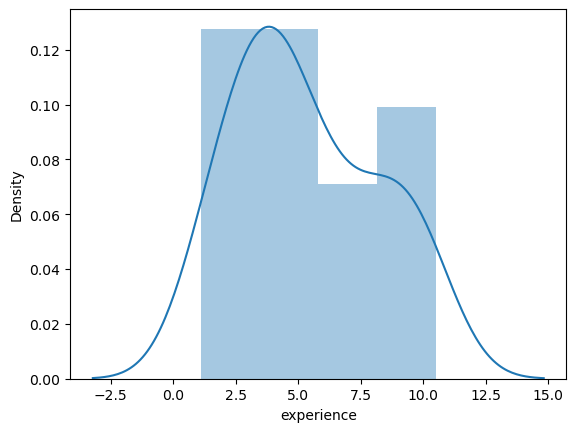

In [91]:
sns.distplot(data['experience'])
plt.show()

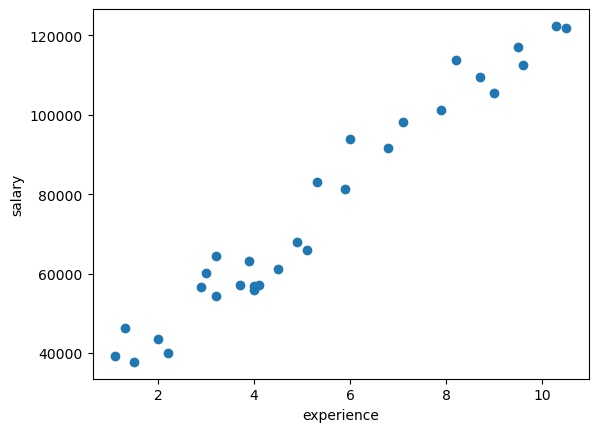

In [18]:
plt.scatter(data['experience'],data['salary']) 
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()

In [50]:
x=data[['experience']].values #.values is used to convert the pandas dataframe to numpy array which helps to work with sklearn
y=data[['salary']].values

In [51]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,random_state=0)

In [61]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(18, 1) (12, 1) (18, 1) (12, 1)


In [53]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [86]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [56]:
print('y intercepts',reg.intercept_)
print('coefficients b1',reg.coef_)

#resulting the y=26838.99+9407.356511x

y intercepts [26838.99589396]
coefficients b1 [[9407.35651165]]


In [73]:
predict=reg.predict(xtest)
predict

array([[ 40950.03066143],
       [123734.76796394],
       [ 65409.15759172],
       [ 63527.68628939],
       [116208.88275462],
       [108682.9975453 ],
       [117149.61840578],
       [ 64468.42194055],
       [ 76697.98540569],
       [101157.11233598],
       [ 54120.32977774],
       [ 74816.51410337]])

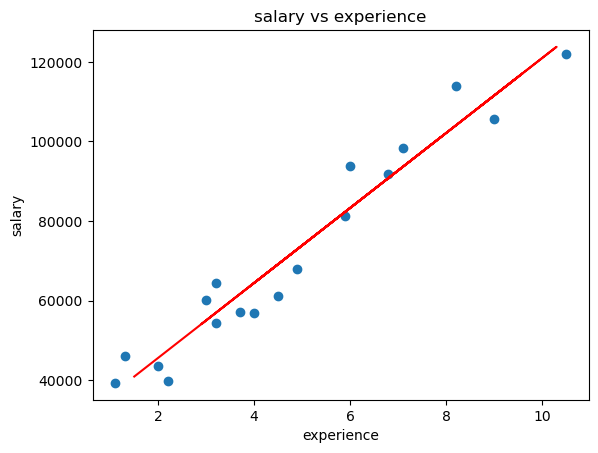

In [84]:
plt.scatter(xtrain,ytrain)
plt.plot(xtest,predict,color='red')
plt.title('salary vs experience')
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()

In [74]:
df1=pd.DataFrame({'Actual':ytest.flatten(),'Predicted':predict.flatten()})
df1.head()

,Actual,Predicted
0,37731,40950.030661
1,122391,123734.767964
2,57081,65409.157592
3,63218,63527.686289
4,116969,116208.882755


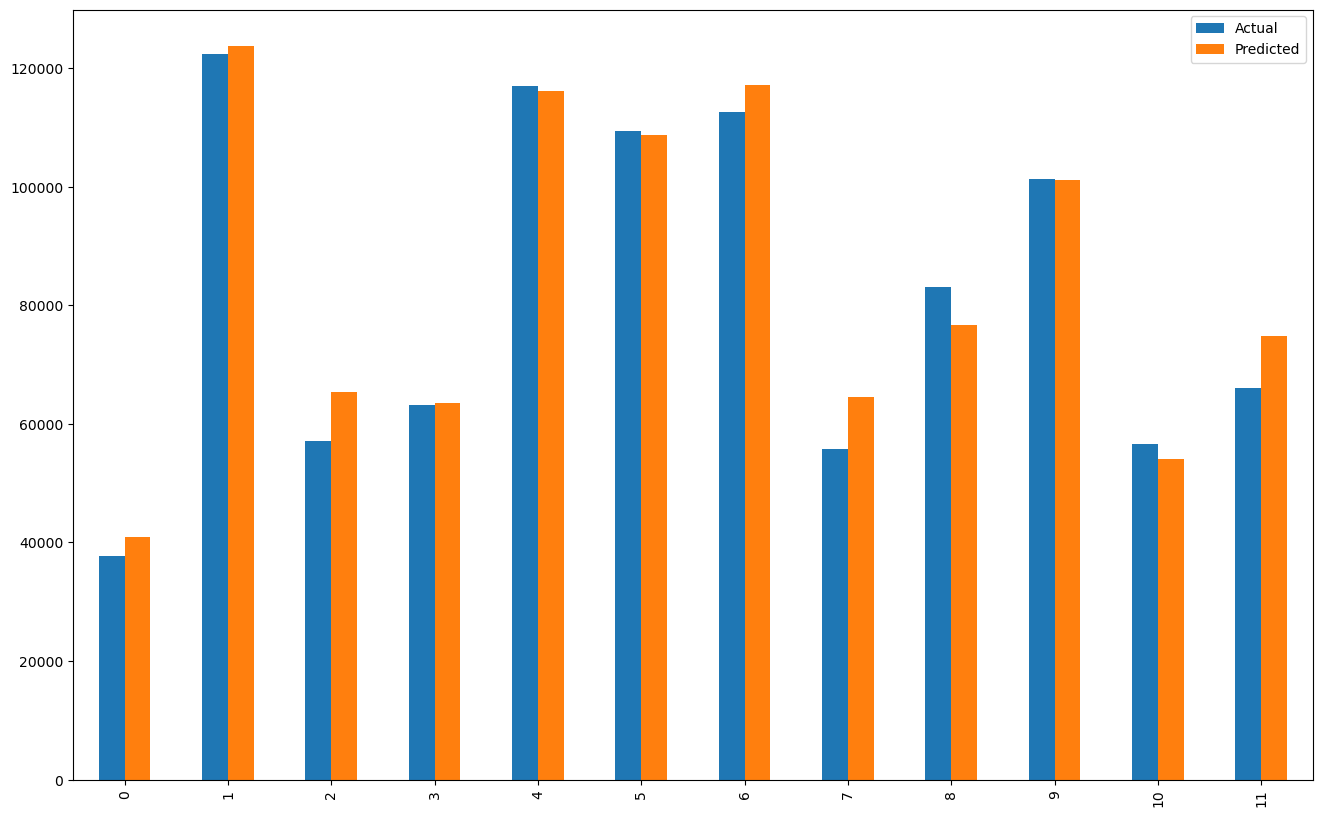

In [67]:
df2=df1.head(15)
df2.plot(kind='bar',figsize=(16,10))
plt.show()

In [ ]:
#metrics calculation

In [72]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('r2_score',r2_score(ytest,predict))
print('MAE',metrics.mean_absolute_error(ytest,predict))
print('MSE',metrics.mean_squared_error(ytest,predict))
print('RMSE',np.sqrt(metrics.mean_squared_error(ytest,predict)))

r2_score 0.9679117063698979
MAE 3811.8240947365284
MSE 25234929.18660527
RMSE 5023.437984747624
